# Lineage Tracking for Cells in the Mother Machine

In [1]:
from LineageTrack.lineage_tracker import LineageTrack
from LineageTrack.visualiser import Visualiser
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display, HTML

### comment out ###
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')
%load_ext autoreload

In [2]:
fov = "024"
mask_dir = "D:\\UROP-Data\\binary_masks\\"
FOV_dir = "F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\FOV{}\\".format(fov)
csv_save_dir = FOV_dir + "csv\\"
vis_save_dir = FOV_dir + "track\\"
template_mask = ['xy', '_mCherry_TR', '_T', '-_epoch-20_prob-99.png']
directory = FOV_dir + "prop\\"
exp = LineageTrack.from_path(directory)

Looking for data at these locations:
F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\prop\xy024_PC_epoch-20_prob-99.csv
F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\prop\xy024_mCherry_epoch-20_prob-99.csv
F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\prop\xy024_YFP_epoch-20_prob-99.csv
Finished loading the data
(14097, 12)


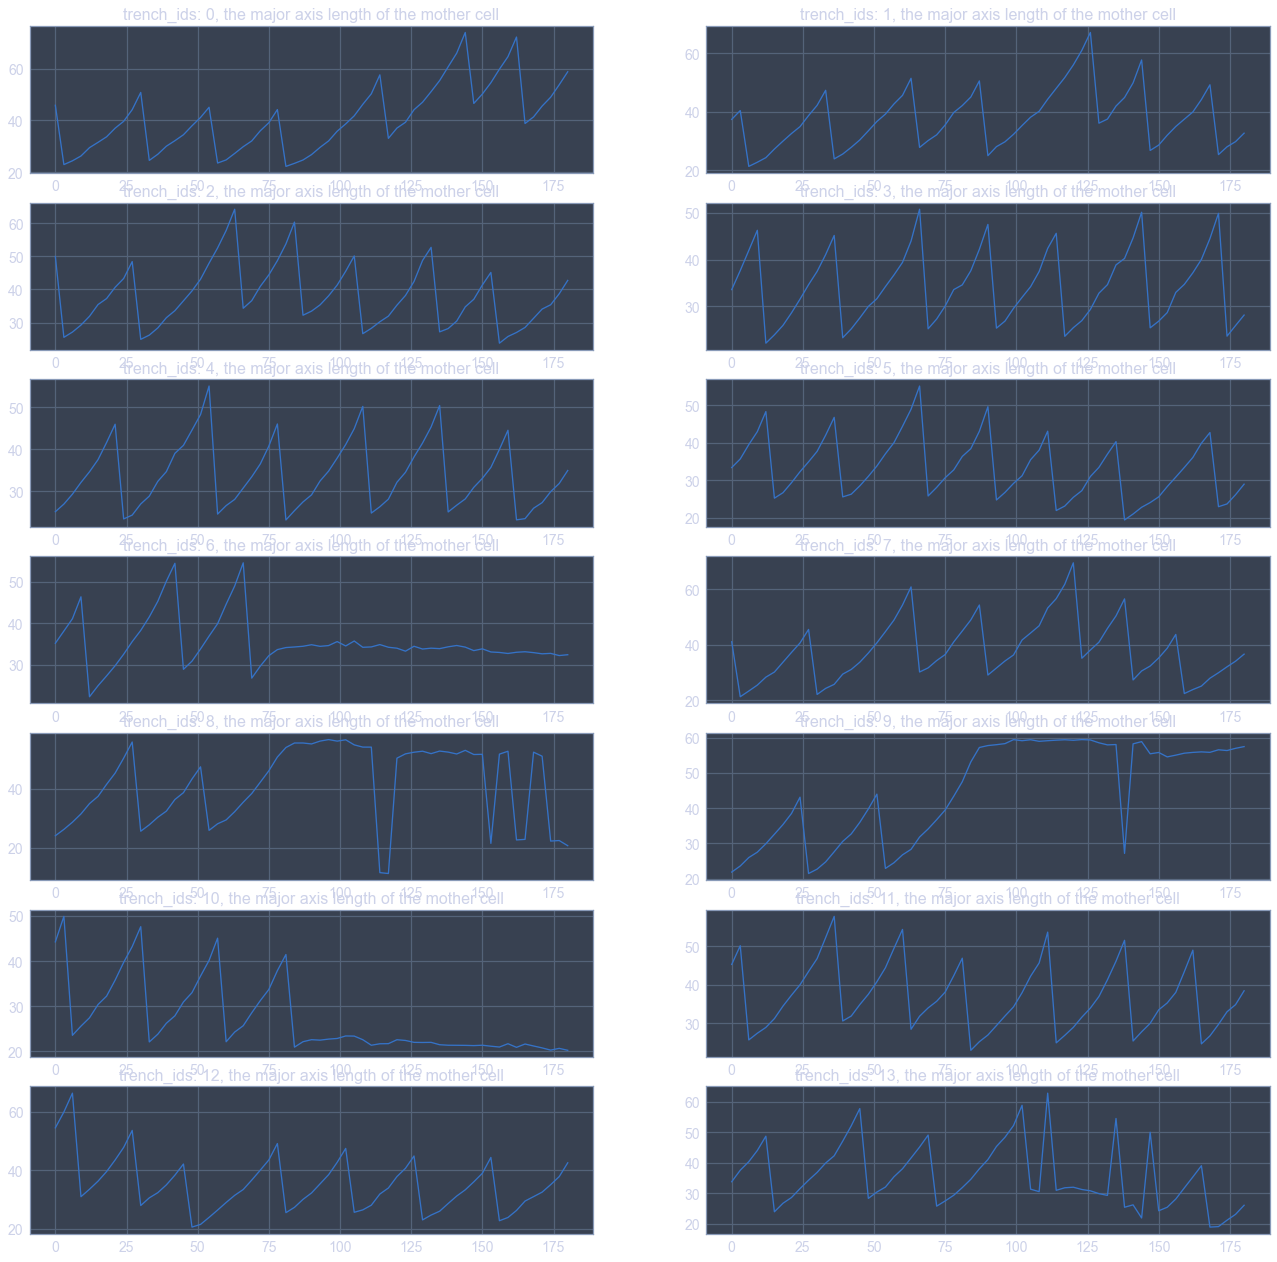

In [3]:
m = exp.get_mother_cell_growth(exp.trenches, plot=True)

In [4]:
exp.trenches

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [5]:
trench_to_track = exp.trenches

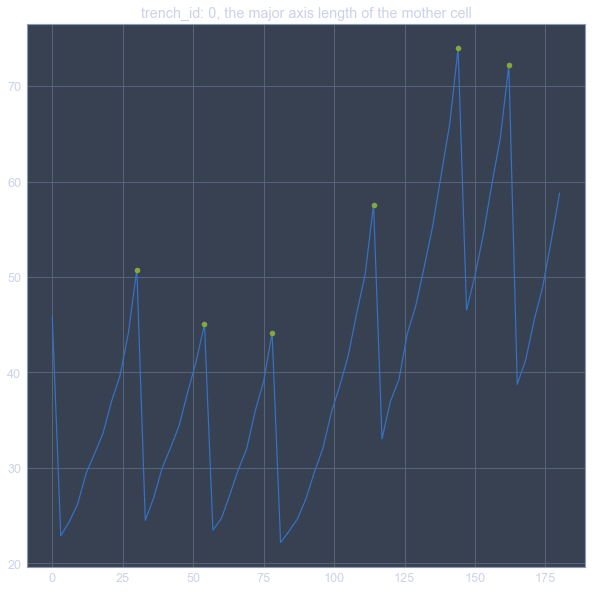

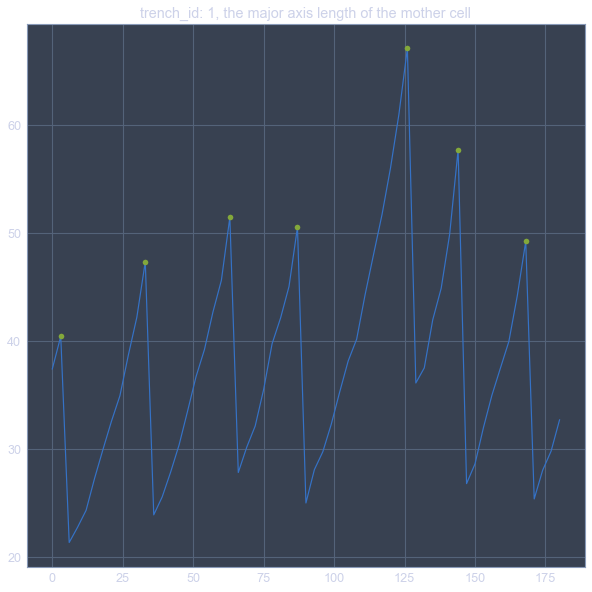

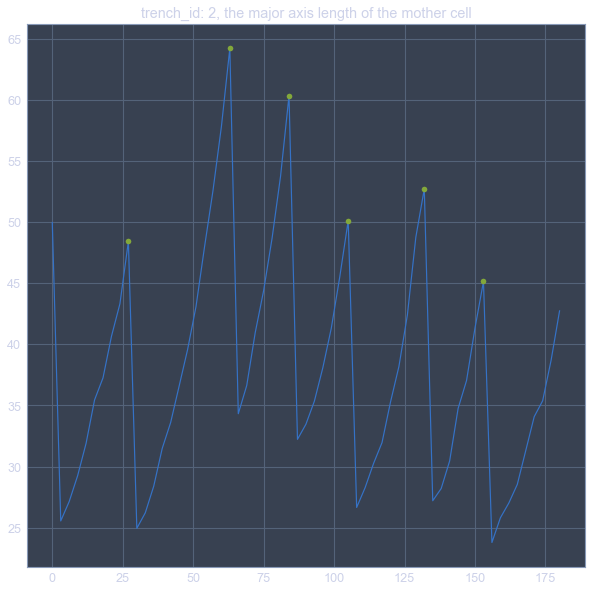

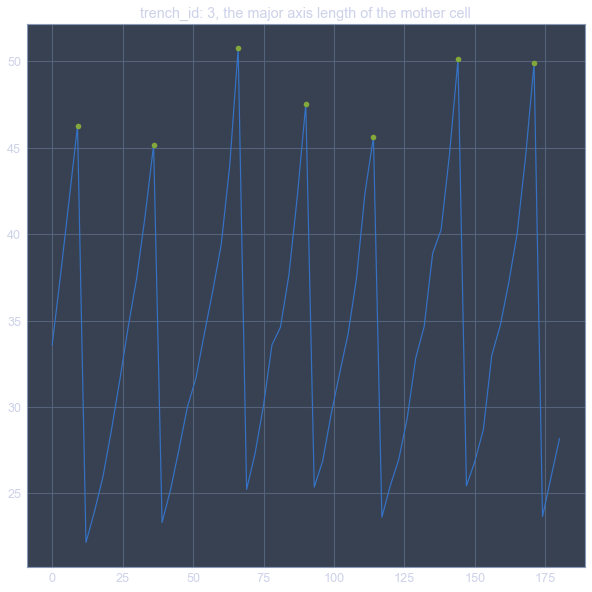

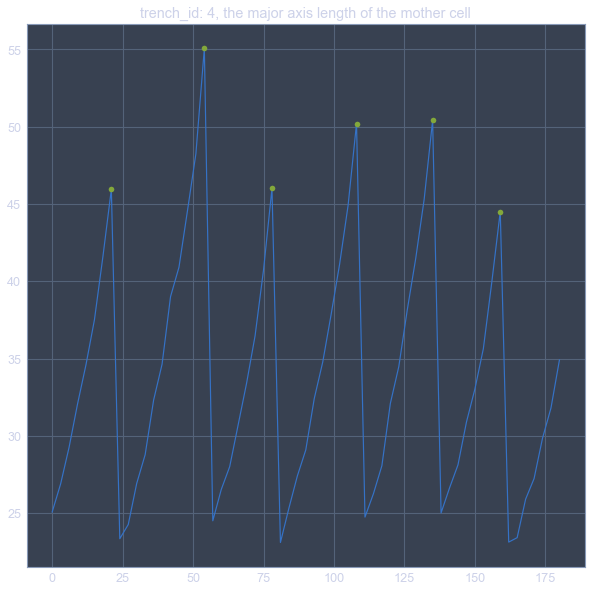

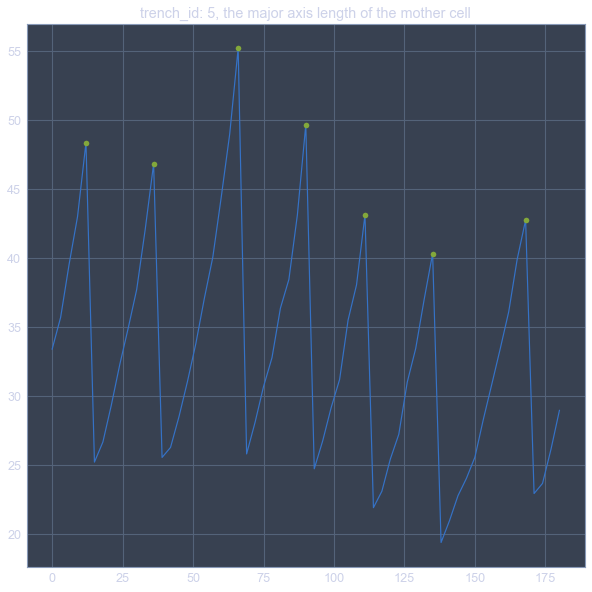

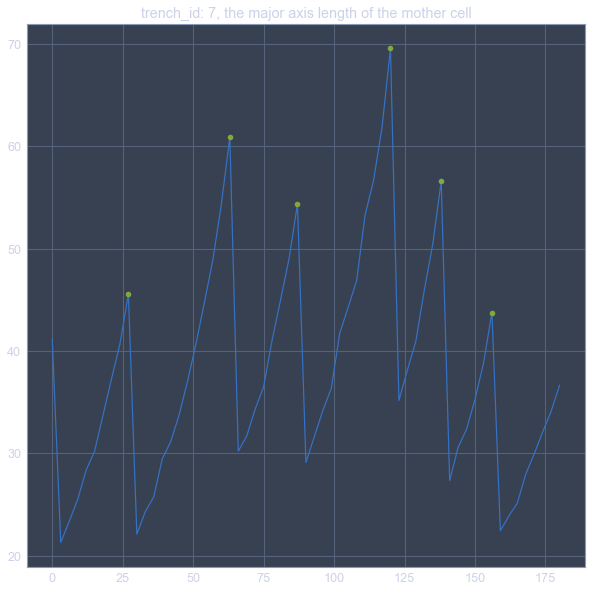

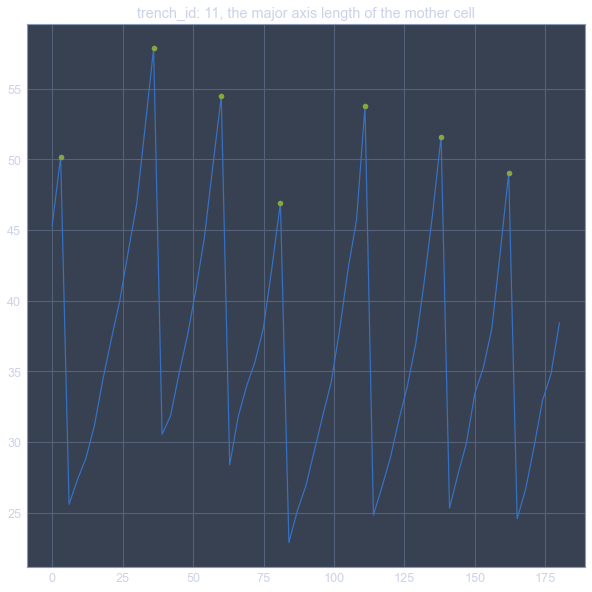

In [6]:
mcell1, idx1 = exp.find_division(0, plot=True)
mcell2, idx2 = exp.find_division(1, plot=True)
mcell3, idx3 = exp.find_division(2, plot=True)
mcell4, idx4 = exp.find_division(3, plot=True)
mcell5, idx5 = exp.find_division(4, plot=True)
mcell6, idx6 = exp.find_division(5, plot=True)
mcell7, idx7 = exp.find_division(7, plot=True)
mcell8, idx8 = exp.find_division(11, plot=True)

In [7]:
exp.collect_model_para(mcell1, idx1[:])
exp.collect_model_para(mcell2, idx2[:])
exp.collect_model_para(mcell3, idx3[:])
exp.collect_model_para(mcell4, idx4[:])
exp.collect_model_para(mcell5, idx5[:])
exp.collect_model_para(mcell6, idx6[:])
exp.collect_model_para(mcell7, idx7[:])
exp.collect_model_para(mcell8, idx8[:])

In [8]:
exp.update_model_para(model="unif")


                    The average time interval for division is 26.522727272727273
                    The time constant for exponential growth is (24.05408238427458, 1.4866062835844716)
                    The average division length is 51.474271480853744 
                    with variance 57.38669360452014 and skewness 0.5364267292257744
                    


In [9]:
exp.track_trenches_iteratively(trenches=trench_to_track, threshold=400, max_dpf=3, search_mode="SeqMatch", 
                               p_sp=0, special_reporter="YFP", show_details=False, save_dir=csv_save_dir, 
                               ret_df=False, fill_gap=False, adap_dpf=True, drift=False, skew_model=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  14 | elapsed:   42.0s remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   6 out of  14 | elapsed:   47.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   9 out of  14 | elapsed:   49.2s remaining:   27.3s
[Parallel(n_jobs=-1)]: Done  12 out of  14 | elapsed:   50.7s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  1.0min finished


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])


'output saved at F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\FOV024\\csv\\track_TR_0_1_2_3_4_5_6_7_8_9_10_11_12_13.csv and F:\\Cambridge\\MENG\\UROP 2022\\Data\\MMLT\\FOV024\\csv\\lysis_TR_0_1_2_3_4_5_6_7_8_9_10_11_12_13.csv.'

In [10]:
%autoreload
paths = [f for f in os.listdir(csv_save_dir) if os.path.isfile(os.path.join(csv_save_dir, f))]
path1 = csv_save_dir + paths[0]
path2 = csv_save_dir + paths[1]
vis = Visualiser.from_path(fov, path1, path2)

In [11]:
%autoreload
vis.label_images(mask_dir, mode="landscape-line", save_dir=vis_save_dir, template=template_mask, fluores=False)

saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_mCherry_TR0_T-_epoch-20_prob-99.png
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_mCherry_TR1_T-_epoch-20_prob-99.png
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_mCherry_TR2_T-_epoch-20_prob-99.png
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_mCherry_TR3_T-_epoch-20_prob-99.png
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_mCherry_TR4_T-_epoch-20_prob-99.png
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_mCherry_TR5_T-_epoch-20_prob-99.png
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_mCherry_TR6_T-_epoch-20_prob-99.png
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_mCherry_TR7_T-_epoch-20_prob-99.png
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\tr

0.0431911890427519
0.021452651371737082
29
{0.0: [(171.0, 174.0, 9.0)], 1.0: [(126.0, 156.0, 9.0), (156.0, 159.0, 9.0)], 2.0: [(123.0, 144.0, 9.0)], 3.0: [(126.0, 159.0, 9.0)], 5.0: [(33.0, 78.0, 9.0)], 6.0: [(96.0, 180.0, 1.0), (168.0, 180.0, 2.0), (162.0, 180.0, 3.0)], 7.0: [(90.0, 105.0, 9.0)], 8.0: [(93.0, 117.0, 1.0), (93.0, 153.0, 1.0), (126.0, 132.0, 5.0), (93.0, 165.0, 1.0), (144.0, 147.0, 7.0), (93.0, 180.0, 1.0), (93.0, 180.0, 2.0), (165.0, 180.0, 5.0), (162.0, 180.0, 6.0)], 9.0: [(99.0, 180.0, 1.0), (99.0, 138.0, 2.0), (99.0, 117.0, 8.0)], 10.0: [(96.0, 180.0, 1.0), (102.0, 180.0, 2.0)], 11.0: [(90.0, 147.0, 9.0), (102.0, 141.0, 10.0), (21.0, 69.0, 9.0)]}


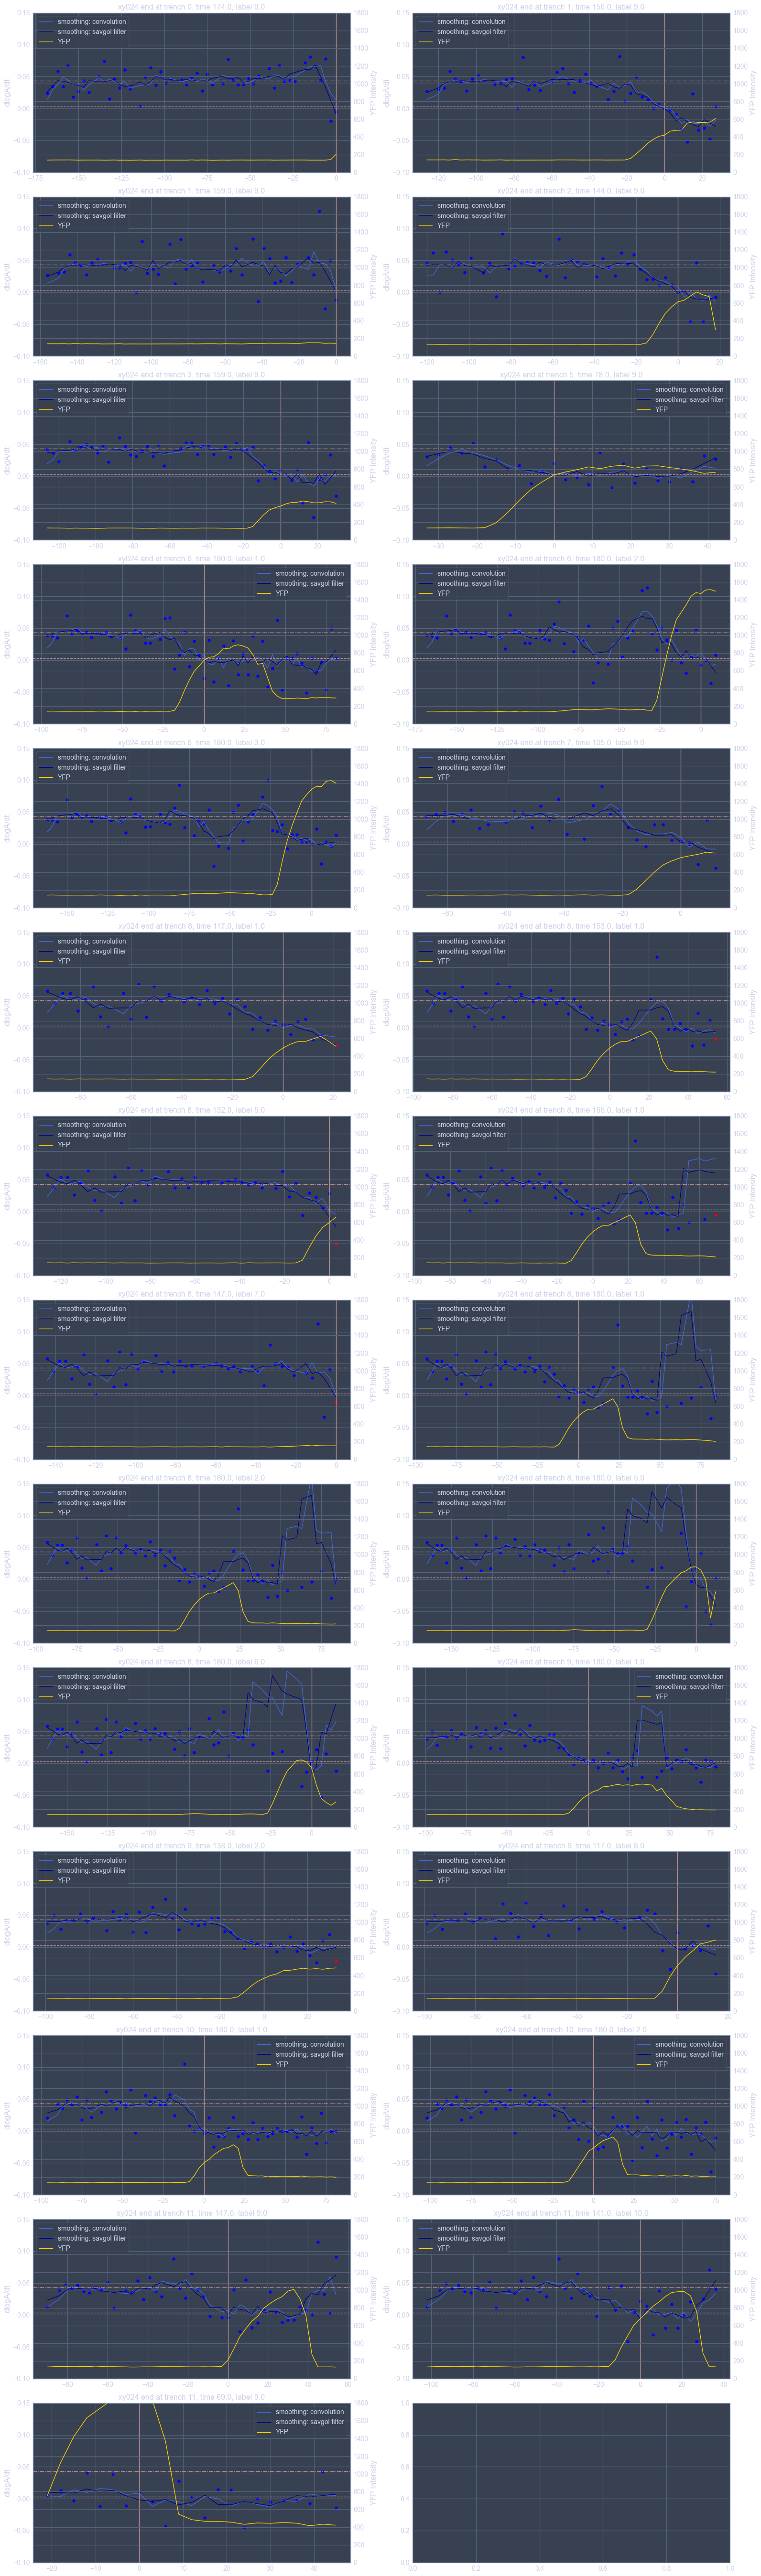

In [14]:
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
import pickle


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def get_model(cells):
    avg_rates = []
    var_rates = []
    count = 0
    all_lineages = dict()
    for key in cells:
        cnt = 0
        
        if int(key) == 13:# or int(key) == 8: # or int(key) == 2:
            continue
        
        all_lineages[key] = exp.generate_lineage(key)
        for line in all_lineages[key]:
            if line.daughters[0] is None:
                
                dlogAdt = []
                t = []
                track = line
                dlogAdt = [res[0] for res in track.partial_dlogA_dt()] + dlogAdt
                t = [res[1][0] for res in track.partial_dlogA_dt()] + t
                while track.parent is not None:
                    track = track.parent
                    dlogAdt = [res[0] for res in track.partial_dlogA_dt()] + dlogAdt
                    t = [res[1][0] for res in track.partial_dlogA_dt()] + t
                if len(dlogAdt) >= 5:
                    avg_rates.append(np.mean(dlogAdt))
                    var_rates.append(np.var(dlogAdt))
                    y_hat = savgol_filter(dlogAdt, 5, 1)
                    for time, y in zip(t, y_hat):
                        lim = 2
                        if y <= np.mean(avg_rates) - lim * np.mean(np.sqrt(var_rates)):
                            count += 1
                            cnt += 1
                            break
#             if int(key) == 2 and cnt == 1:
#                 break
#             if int(key) == 3 and cnt == 1:
#                 break
#             if int(key) == 8 and cnt == 4:
#                 break
    return avg_rates, var_rates, count

def detect_infection(subplots, cells, avg_rates, var_rates):
    cols = 2
    rows = round(np.ceil(subplots / cols))
    fig, axes = plt.subplots(nrows=rows, ncols=cols, dpi=80, figsize=(20, subplots/4 * 10))
    fig.tight_layout()
    axes_flat = axes.flatten()
    i = 0
    
    infection_times = dict()
    all_lineages = dict()
    for key in cells:
        cnt = 0
        
        if int(key) == 13:# or int(key) == 8: #or int(key) == 2:
            continue

        all_lineages[key] = exp.generate_lineage(key)
        for line in all_lineages[key]:
            if line.daughters[0] is None:
                track = line
                dlogAdt = [res[0] for res in track.partial_dlogA_dt()]
                yfp = track.reporter_intensities[:-1]
                t = [res[1][0] for res in track.partial_dlogA_dt()]
                while track.parent is not None:
                    track = track.parent
                    dlogAdt = [res[0] for res in track.partial_dlogA_dt()] + dlogAdt
                    yfp = track.reporter_intensities[:-1] + yfp
                    t = [res[1][0] for res in track.partial_dlogA_dt()] + t
                if len(dlogAdt) >= 5:
                    y_hat = savgol_filter(dlogAdt, 5, 1)
                    for time, y in zip(t, y_hat):
                        lim = 2
                        if y <= np.mean(avg_rates) - lim * np.mean(np.sqrt(var_rates)):
                            
#                             if int(key) == 2 and (cnt in[0, 1, 2, 3, 4, 5]):
#                                 cnt += 1
#                                 break
                            
                            axes_flat[i].scatter(t - time, dlogAdt, c='blue')
                            if line.lyse:
                                axes_flat[i].scatter((t - time)[-1], dlogAdt[-1], c='red')
                            lns1 = axes_flat[i].plot(t - time, smooth(dlogAdt, 4), 'royalblue', label='smoothing: convolution')
                            lns2 = axes_flat[i].plot(t - time, y_hat, 'darkblue', label='smoothing: savgol filter')
                            axes_flat[i].axvline(x=0, color='rosybrown')
                            axes_flat[i].axhline(y=np.mean(avg_rates), color='rosybrown', linestyle = '-.')
                            axes_flat[i].axhline(y=np.mean(avg_rates) - lim * np.mean(np.sqrt(var_rates)), 
                                                 color='rosybrown', linestyle = '--')
                            axes_flat[i].set_ylabel("dlogA/dt")
                            axes_flat[i].set_ylim([-0.1, 0.15])
                            axes2 = axes_flat[i].twinx()
                            lns3 = axes2.plot(t - time, yfp, 'gold', label='YFP')
                            axes2.set_ylabel("YFP Intensity")
                            axes2.set_ylim([0, 1800])
                            axes_flat[i].set_title(f"xy{fov} end at trench {key}, time {line.resident_time[-1]}, label {line.labels[-1]}")
                            lns = lns1+lns2+lns3
                            labs = [l.get_label() for l in lns]
                            axes_flat[i].legend(lns, labs)
                            
                            # if i in []:
                            save_path1 = FOV_dir + f"YFP_axis\\xy{fov}_TR{key}_T{int(line.resident_time[-1])}_L{int(line.labels[-1])}_lysis{line.lyse}"
                            np.save(save_path1, yfp)
                            save_path2 = FOV_dir + f"t_axis\\xy{fov}_TR{key}_T{int(line.resident_time[-1])}_L{int(line.labels[-1])}_lysis{line.lyse}"
                            np.save(save_path2, t - time)
                            save_path3 = FOV_dir + f"growth_axis\\xy{fov}_TR{key}_T{int(line.resident_time[-1])}_L{int(line.labels[-1])}_lysis{line.lyse}"
                            np.save(save_path3, y_hat)
                            
                            line.highlight = True
                            cnt += 1
                            i += 1
                            if not line.trench in infection_times:
                                infection_times[line.trench] = list()
                            infection_times[line.trench].append((time, line.resident_time[-1], line.labels[-1]))
                            break
#                 if int(key) == 6 and cnt == 1:
#                     break
#                 if int(key) == 3 and cnt == 1:
#                     break
#                 if int(key) == 8 and cnt == 4:
#                     break
            if i >= subplots:
                fig.tight_layout()
                fig.savefig(FOV_dir + 'growth_rate_and_YFP.png')
                with open(FOV_dir + 'all_lineage', 'wb') as pickle_file:
                    pickle.dump(all_lineages, pickle_file)
                return infection_times
    fig.tight_layout()
    fig.savefig(FOV_dir + 'growth_rate_and_YFP.png')
    with open(FOV_dir + 'all_lineage', 'wb') as pickle_file:
                    pickle.dump(all_lineages, pickle_file)
    return infection_times
avg_rates, var_rates, subplots = get_model(exp.all_cells)
print(np.mean(avg_rates))
print(np.sqrt(np.mean(var_rates)))
print(subplots)
if not os.path.isdir(FOV_dir + "YFP_axis\\"):
    os.mkdir(FOV_dir + "YFP_axis\\")
if not os.path.isdir(FOV_dir + "t_axis\\"):
    os.mkdir(FOV_dir + "t_axis\\")
if not os.path.isdir(FOV_dir + "growth_axis\\"):
    os.mkdir(FOV_dir + "growth_axis\\")
infect = detect_infection(subplots-2, exp.all_cells, avg_rates, var_rates)

print(infect)

In [15]:
%autoreload
for k in infect:
    lineages = [exp.generate_lineage(k, mode="footprint", frame=int(e[1]/3), label=int(e[2])) for e in infect[k]]
    vis.highlight_lineage(lineages,
                          f"F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV{fov}/track/landscape_line_xy{fov}_mCherry_TR{int(k)}_T-_epoch-20_prob-99.png",
                          f"F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV{fov}/track/")

saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV024/track/\highlighted_landscape_line_xy024_mCherry_TR0_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV024/track/\highlighted_landscape_line_xy024_mCherry_TR1_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV024/track/\highlighted_landscape_line_xy024_mCherry_TR2_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV024/track/\highlighted_landscape_line_xy024_mCherry_TR3_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV024/track/\highlighted_landscape_line_xy024_mCherry_TR5_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV024/track/\highlighted_landscape_line_xy024_mCherry_TR6_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV024/track/\highlighted_landscape_line_xy024_mCherry_TR7_T-_epoch-20_prob-99.png
saved as F:/Cambridge/MENG/UROP 2022/Data/MMLT/FOV024/track/\highlighted_landscape_line_xy

In [16]:
%autoreload
mask_dir = "D:\\UROP-Data\\trenches\\"
template_mask = ['xy', '_YFP_TR', '_T', '.tif']
vis.label_images(mask_dir, mode="landscape-line", save_dir=vis_save_dir, template=template_mask, fluores=10)

saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR0_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR1_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR2_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR3_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR4_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR5_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR6_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR7_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR8_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_YFP_TR9_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Dat

In [17]:
%autoreload
mask_dir = "D:\\UROP-Data\\trenches\\"
template_mask = ['xy', '_PC_TR', '_T', '.tif']
vis.label_images(mask_dir, mode="landscape-line", save_dir=vis_save_dir, template=template_mask, fluores=5)

saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR0_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR1_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR2_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR3_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR4_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR5_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR6_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR7_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR8_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV024\track\\landscape_line_xy024_PC_TR9_T.tif
saved as F:\Cambridge\MENG\UROP 2022\Data\MMLT\FOV